# Maglev tog

## Introduksjon

Undersøkende spørsmål:
"Hvordan kan et tog drevet av magnetfeltet oppnå en hastighet på 11100 m/s"

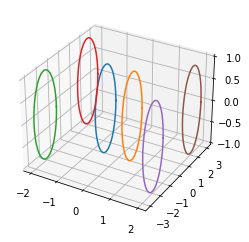

In [1]:
#simulering av spolenes posisjon i rommet.
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

def spole_plot(r,theta):

    y = r*np.cos(theta)
    z = r*np.sin(theta)
    x = np.zeros_like(y)

    ax.plot(x-r/2, y, z)
    ax.plot(x+r/2, y, z)

    ax.plot(x-2, y-2, z)
    ax.plot(x-2, y+2, z)


    ax.plot(x+2, y-2, z)
    ax.plot(x+2, y+2, z)
    return

r = 1
theta = np.linspace(0, 2 * np.pi, 201)
spole_plot(r,theta)
plt.show()

## Simpel modell

## Teori

Bio Savarts lov:
$$\vec{B}(\vec{r})=\frac{\mu_0 \vec{I}x\hat{R}}{4 \pi R^2}$$

På integralform:
$$\vec{B}(\vec{r})=\oint_C \frac{\mu_0 Id\vec{l}x\hat{R}}{4 \pi R^2}$$

Feltet for en sirkulær leder med strømstyrke $I$ blir først for et lite strømelement $d\vec{l}$:
$$d\vec{B} = \frac{\mu_0 Id\vec{l}x\hat{R}}{4\pi R^2}$$
Et av disse linjeelementene $d\vec{l}$ vil være bare på sirklene og derfor bare havhenge av $\theta$. Dette gir os at vi får $d\vec{l}=ad\theta \hat{\theta}$. Dette vi si at når vi i Bio Savarts lov går over linjeelementene er det magnetsike feltet som settes opp av strømmen $I$, bare gå over sirkelen til spolen vi har definert.

For å definere uttrykket for alle disse linjelementenes påvirkning på feltet må vi finner vi:
$$\vec{B}=\oint_C d\vec{B}$$
Denne lukkede kurven C vil altså være det som blir spolen.

In [2]:
#simuleringav et magnetfelt:
def bfield(r,I,a,c):
    B = np.zeros(3)
    N=100
    theta = np.linspace(0,2*np.pi,N)
    
    for i in range(N):
        ri = np.array([c[0],c[1]+a*np.cos(theta[i]),c[2]+a*np.sin(theta[i])])
        dli = np.array([c[0],-a*np.sin(theta[i]),a*np.cos(theta[i])])
        R = r-ri
        Rnorm = np.linalg.norm(R)
        Runit = R/Rnorm
        dB = I*np.cross(dli,Runit)/(4*np.pi*Rnorm**2)
        B = B+dB
    return B
x= np.linspace(-3,3,10)
r = 0
I=1
a=1
center = [np.array([1,0,0]),np.array([-1,0,0]),np.array([3,2,0]),np.array([3,-2,0]),np.array([-3,2,0]),np.array([-3,-2,0])]
def B_total(r):
    return (bfield(r,-I,a,center[0])+bfield(r,-I,a,center[1]) +bfield(r,-I,a,center[2])+bfield(r,I,a,center[3])
                                +bfield(r,I,a,center[4])+bfield(r,-I,a,center[5]))

In [19]:
L = 5
NL = 30
x = np.linspace(-L,L,NL)
y = np.linspace(-L,L,NL)
#z = np.linspace(-L,L,NL)
rx,ry = np.meshgrid(x,y)
Bx = rx.copy()
By = ry.copy()

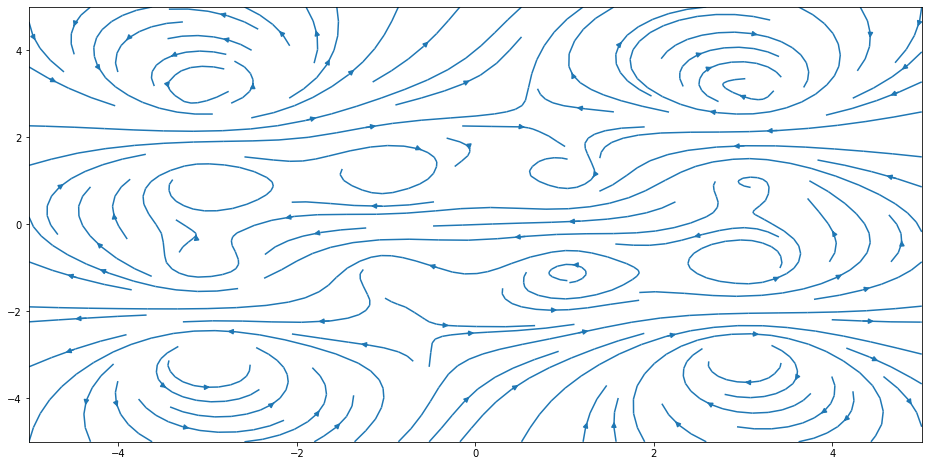

In [20]:
for i in range(len(rx.flat)):
    r = np.array([rx.flat[i],ry.flat[i],0])
    Bx.flat[i],By.flat[i],Bz = B_total(r)
plt.figure(figsize=(16,8))
plt.streamplot(x,y,Bx,By)

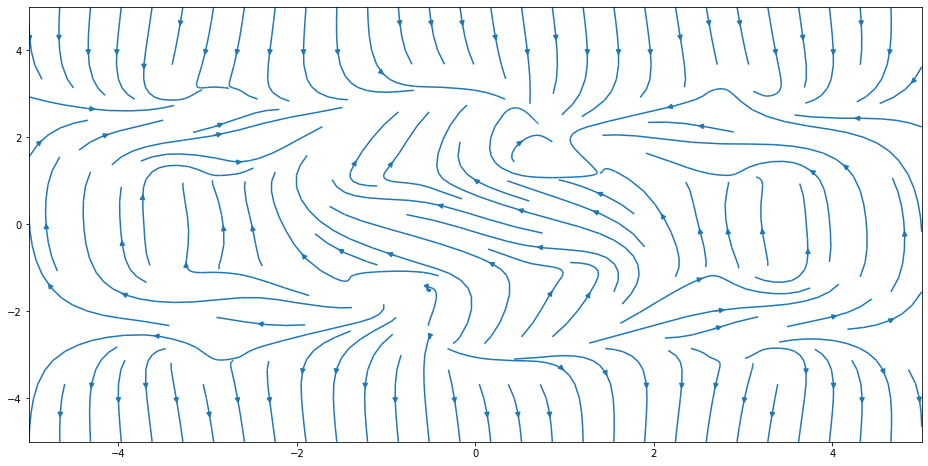

In [21]:
for i in range(len(rx.flat)):
    r = np.array([rx.flat[i],ry.flat[i],0])
    Bx.flat[i],Bz,By.flat[i] = B_total(r)
plt.figure(figsize=(16,8))
plt.streamplot(x,y,Bx,By)

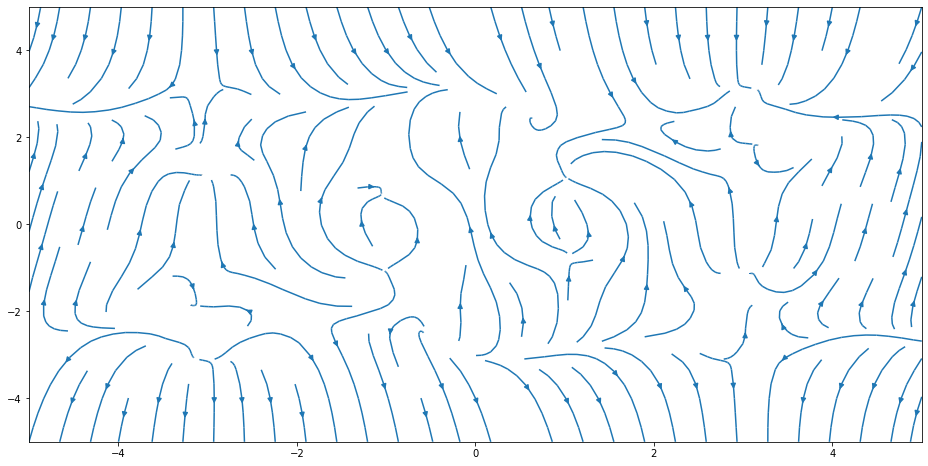

In [22]:
for i in range(len(rx.flat)):
    r = np.array([rx.flat[i],ry.flat[i],0])
    Bz,Bx.flat[i],By.flat[i] = B_total(r)
plt.figure(figsize=(16,8))
plt.streamplot(x,y,Bx,By)

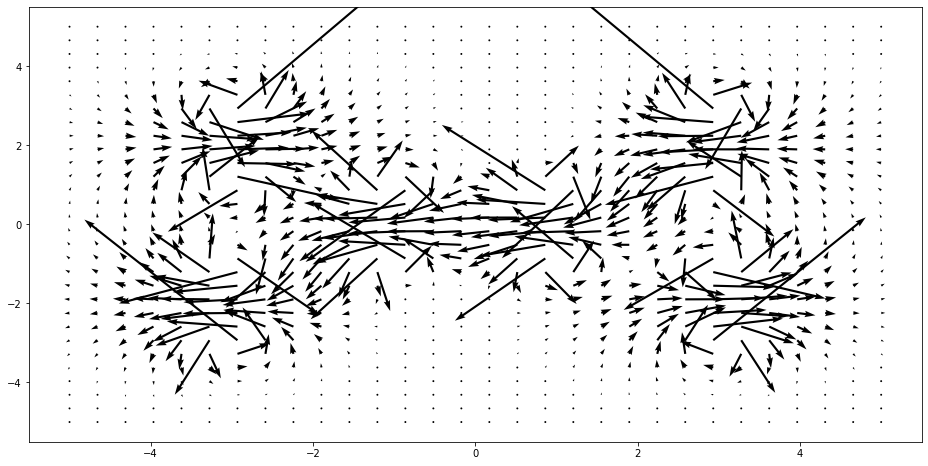

In [23]:
for i in range(len(rx.flat)):
    r = np.array([rx.flat[i],ry.flat[i],0])
    Bx.flat[i],By.flat[i],Bz = B_total(r)
plt.figure(figsize=(16,8))
plt.quiver(x,y,Bx,By)

## Kilder:
